In [1]:
import pandas as pd

# Load the dataframe.
df = pd.read_csv("shopping_trends.csv")

# Print some info.
print(df.head())
print(df.info())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

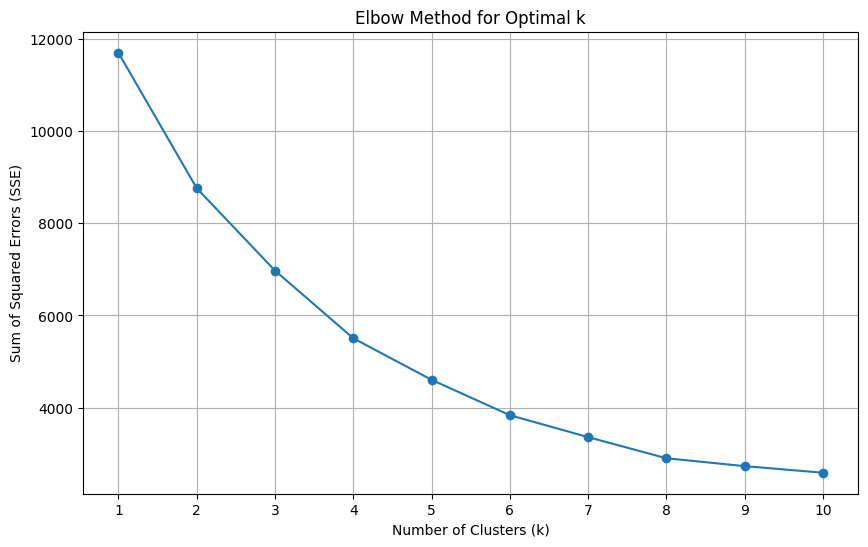

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataframe.
df = pd.read_csv("shopping_trends.csv")

# Select the features for clustering.
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X = df[features]

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the sum of squared errors for a range of k values.
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve.
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('elbow_method.png')

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataframe.
df = pd.read_csv("shopping_trends.csv")

# Select the features for clustering.
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X = df[features]

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with k=4.
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the segments.
# Group by cluster and calculate mean for numerical features.
segment_summary_num = df.groupby('Cluster')[features].mean().reset_index()

# For categorical features, find the most frequent category.
segment_summary_cat = df.groupby('Cluster').agg(
    Most_Frequent_Gender=pd.NamedAgg(column='Gender', aggfunc=lambda x: x.mode()[0]),
    Most_Frequent_Category=pd.NamedAgg(column='Category', aggfunc=lambda x: x.mode()[0]),
    Most_Frequent_Review_Rating=pd.NamedAgg(column='Review Rating', aggfunc=lambda x: x.mode()[0]),
    Most_Frequent_Subscription_Status=pd.NamedAgg(column='Subscription Status', aggfunc=lambda x: x.mode()[0]),
    Most_Frequent_Shipping_Type=pd.NamedAgg(column='Shipping Type', aggfunc=lambda x: x.mode()[0])
)

# Combine the summaries.
segment_summary = pd.merge(segment_summary_num, segment_summary_cat, on='Cluster')

# Print the summary.
print("Segment Summary:")
print(segment_summary)

# Save the DataFrame to a CSV file for the user.
df.to_csv("customer_segments.csv", index=False)

Segment Summary:
   Cluster        Age  Purchase Amount (USD)  Previous Purchases  \
0        0  56.780149              82.472785           28.302028   
1        1  32.372299              63.258350           11.209234   
2        2  30.949462              57.781720           38.545161   
3        3  56.084729              37.113300           24.723153   

  Most_Frequent_Gender Most_Frequent_Category  Most_Frequent_Review_Rating  \
0                 Male               Clothing                          4.9   
1                 Male               Clothing                          3.2   
2                 Male               Clothing                          3.4   
3                 Male               Clothing                          2.6   

  Most_Frequent_Subscription_Status Most_Frequent_Shipping_Type  
0                                No               Free Shipping  
1                                No               Free Shipping  
2                                No                  

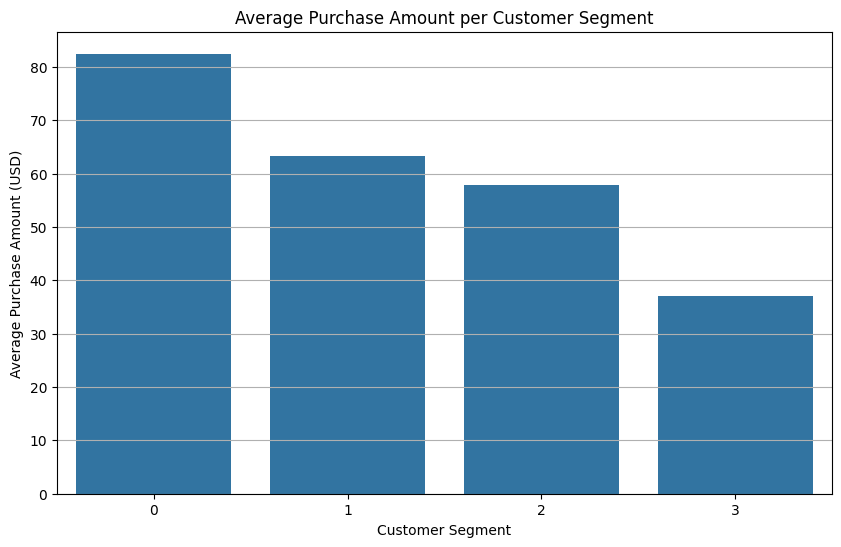

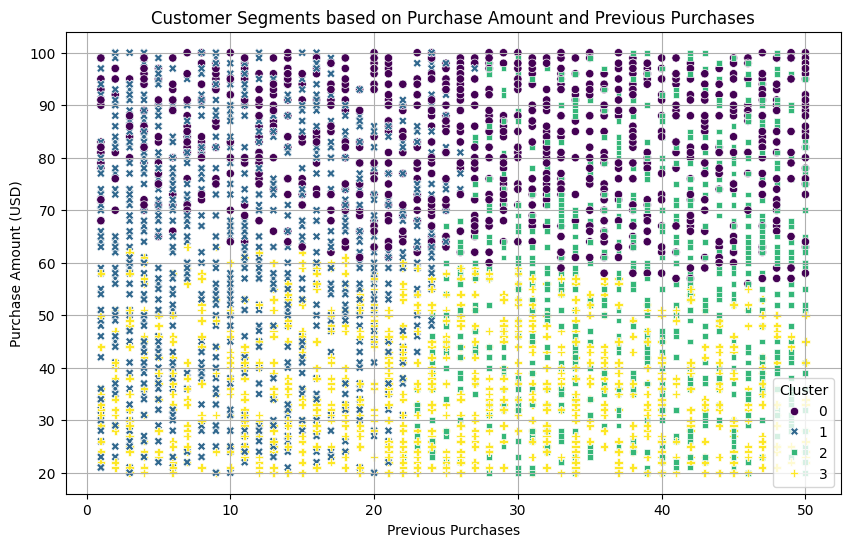

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataframe.
df = pd.read_csv("shopping_trends.csv")

# Select the features for clustering.
features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']
X = df[features]

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with k=4.
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create a bar chart for average purchase amount per cluster.
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Purchase Amount (USD)', data=df, errorbar=None)
plt.title('Average Purchase Amount per Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.savefig('average_purchase_amount.png')

# Create a scatter plot of Purchase Amount vs. Previous Purchases.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', hue='Cluster', data=df, palette='viridis', style='Cluster')
plt.title('Customer Segments based on Purchase Amount and Previous Purchases')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True)
plt.savefig('purchase_amount_vs_previous_purchases.png')

Veri İncelemesi ve Hazırlığı

Veri setinizde 3900 müşteri kaydı ve 19 sütun bulunmaktadır. Müşteri segmentasyonu için en uygun olan sayısal değişkenler olan Age, Purchase Amount (USD) ve Previous Purchases sütunlarını kullandım. K-Means kümeleme algoritmasını uygulamadan önce, bu verileri ölçeklendirdim.

En Uygun Küme Sayısının Belirlenmesi

En uygun küme sayısını belirlemek için "dirsek (elbow)" yöntemini kullandım. Yöntemin görselleştirilmesi, 3 veya 4 küme sayısının uygun olabileceğini gösterdi. Daha detaylı bir segmentasyon için 4 kümeye karar verdim.

Müşteri Segmentlerinin Analizi

K-Means algoritması ile oluşturulan 4 müşteri segmentini analiz ettim. Her bir segment için ana özellikler şunlardır:

Segment 0 (Yüksek Değerli Sadık Müşteriler): Bu segmentteki müşteriler en yüksek ortalama yaşa (56.78) ve en yüksek ortalama harcamaya (82.47) sahiptir. Aynı zamanda en yüksek ortalama geçmiş satın alma sayısına (28.30) sahiptirler. Bu grup, 'Ücretsiz Kargo' tipini tercih etmekte ve en sık 'Giyim' kategorisinden ürün satın almaktadır. Yüksek harcama ve geçmiş satın alma sayısıyla bu segment, işletme için en değerli müşteri grubunu temsil eder.

Segment 1 (Genç ve Yeni Müşteriler): Bu segment en genç ortalama yaşa (32.37), ortalama bir harcama miktarına (63.26) ve en düşük ortalama geçmiş satın alma sayısına (11.21) sahiptir. En sık 'Erkek' cinsiyetine ait müşterilerden oluşur. Bu grup, büyüme potansiyeli yüksek olan genç ve yeni müşterileri temsil eder.

Segment 2 (Sık Alışveriş Yapanlar): Bu segment, genç bir ortalama yaşa (30.95) sahiptir ancak geçmiş satın alma sayısı en yüksek olan gruptur (38.55). Bu, onların sürekli ve sık alışveriş yapan müşteriler olduğunu gösterir. Ortalama harcama miktarları diğer segmentlere göre ortalama seviyededir (57.78). En sık 'Standart' kargo tipini tercih ederler.

Segment 3 (Bütçe Odaklı Olgun Müşteriler): Bu segment, yüksek bir ortalama yaşa (56.08) sahip olmasına rağmen, en düşük ortalama harcama miktarına (37.11) sahiptir. Geçmiş satın alma sayıları orta seviyededir (24.72). En sık Giyim kategorisinden ürün satın alırlar. Bu segment, fiyat/performans ürünlerine odaklanan veya indirimleri takip eden müşterileri temsil edebilir.

Görselleştirme

Analizlerimi desteklemek için iki grafik oluşturdum:

Her Müşteri Segmenti için Ortalama Harcama Miktarı: Bu grafik, Segment 0'ın diğer tüm segmentlere göre açık ara en yüksek ortalama harcamaya sahip olduğunu açıkça göstermektedir.

Müşteri Segmentlerinin Harcama ve Önceki Satın Alma Durumu: Bu grafik, segmentlerin harcama miktarı ve geçmiş satın alma sayısı açısından nasıl farklılaştığını göstermektedir.

Sonuç ve Öneriler

Bu segmentasyon analizi, müşteri kitlenizin farklı davranış kalıplarına sahip gruplardan oluştuğunu göstermektedir. İşletme, her bir segmente özel pazarlama stratejileri geliştirerek satışları artırabilir. Örneğin:

Segment 0 için: Sadakat programlarını güçlendirmek ve özel ürünler sunmak.

Segment 1 ve 2 için: Daha fazla müşteri etkileşimi sağlamak ve yeni ürünleri tanıtmak.



Top 5 Categories by Total Revenue:
             Purchase_Count  Total_Revenue
Category                                  
Clothing               1737         104264
Accessories            1240          74200
Footwear                599          36093
Outerwear               324          18524


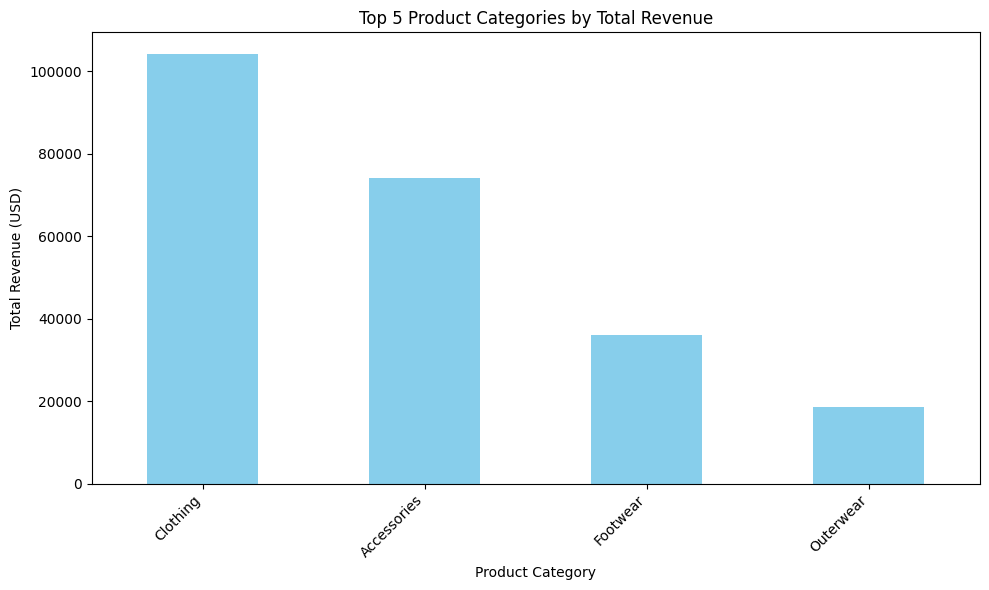

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data.
df = pd.read_csv("shopping_trends.csv")

# Group by category to find the most popular categories by purchase count and total revenue.
category_analysis = df.groupby('Category').agg(
    Purchase_Count=('Item Purchased', 'count'),
    Total_Revenue=('Purchase Amount (USD)', 'sum')
).sort_values(by='Total_Revenue', ascending=False)

# Print the top 5 categories by revenue.
print("Top 5 Categories by Total Revenue:")
print(category_analysis.head(5))

# Create a bar chart for the top 5 categories by total revenue.
top_5_categories = category_analysis.head(5)
plt.figure(figsize=(10, 6))
top_5_categories['Total_Revenue'].plot(kind='bar', color='skyblue')
plt.title('Top 5 Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_categories_by_revenue.png')

Average Purchase Amount by Gender:
   Gender  Purchase Amount (USD)
0  Female              60.249199
1    Male              59.536199

Top 10 Locations by Average Purchase Amount:
         Location  Purchase Amount (USD)
1          Alaska              67.597222
37   Pennsylvania              66.567568
2         Arizona              66.553846
47  West Virginia              63.876543
27         Nevada              63.379310
46     Washington              63.328767
33   North Dakota              62.891566
45       Virginia              62.883117
43           Utah              62.577465
21       Michigan              62.095890


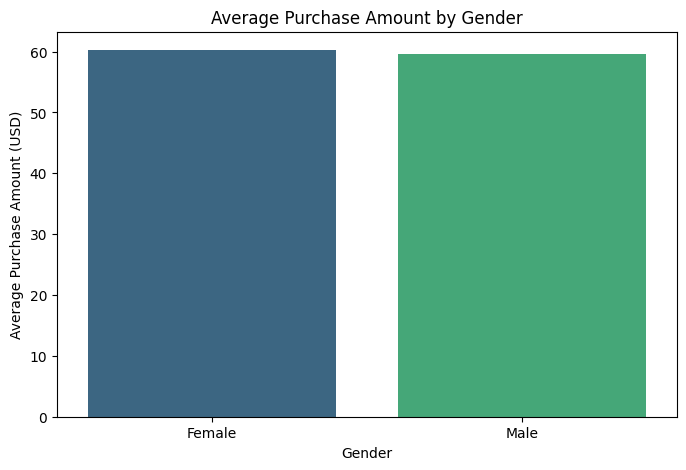

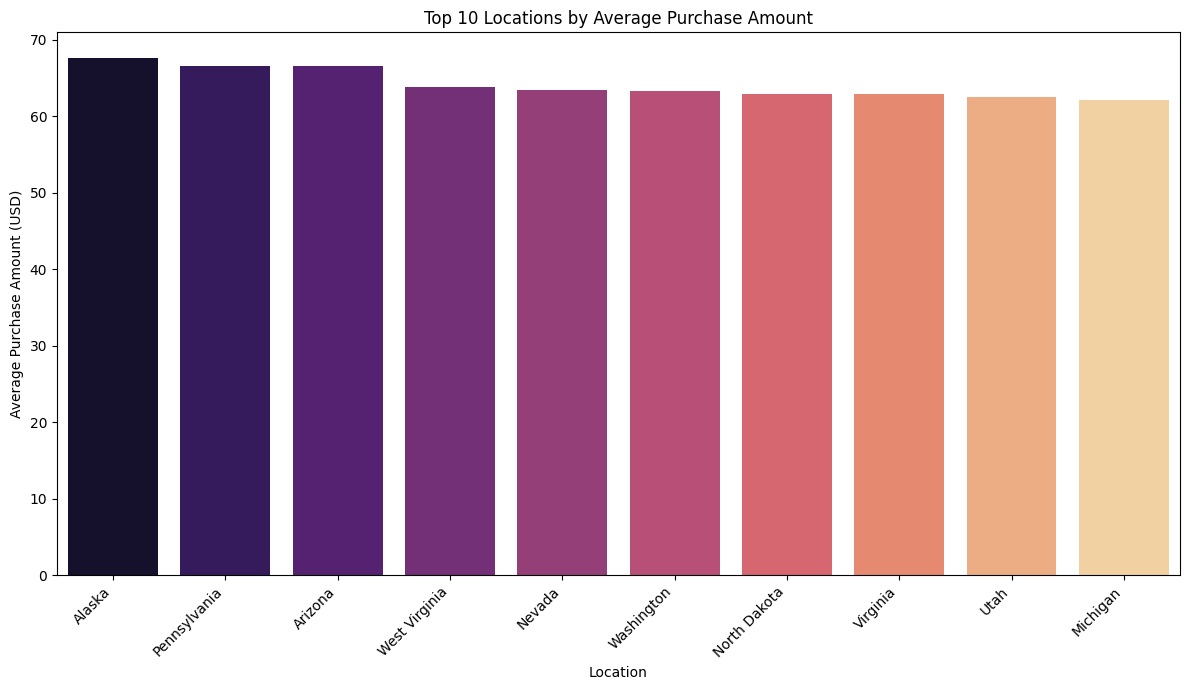

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data.
df = pd.read_csv("shopping_trends.csv")

# Analyze average purchase amount by Gender.
avg_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()
print("Average Purchase Amount by Gender:")
print(avg_purchase_by_gender)

# Analyze average purchase amount by Location.
avg_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

# Get the top 10 locations by average purchase amount.
top_10_locations = avg_purchase_by_location.sort_values(by='Purchase Amount (USD)', ascending=False).head(10)
print("\nTop 10 Locations by Average Purchase Amount:")
print(top_10_locations)

# Create a bar chart for average purchase amount by gender.
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Purchase Amount (USD)', data=avg_purchase_by_gender, palette='viridis')
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.savefig('avg_purchase_by_gender.png')

# Create a bar chart for top 10 locations by average purchase amount.
plt.figure(figsize=(12, 7))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=top_10_locations, palette='magma')
plt.title('Top 10 Locations by Average Purchase Amount')
plt.xlabel('Location')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_locations_by_avg_purchase.png')

1. Ürün Kategorisi ve Gelir Analizi

Veri setinizdeki en popüler ürün kategorilerini ve bu kategorilerin toplam gelir içindeki payını analiz ettim. Bu analiz, işletmenin hangi ürün gruplarına odaklanması gerektiğini belirlemede yardımcı olabilir.

Giyim kategorisi, hem satın alma sayısı (1737) hem de toplam gelir (104264) açısından açık ara en baskın kategoridir.

Aksesuar kategorisi ikinci en yüksek geliri (74200) üretmektedir, ardından Ayakkabı (36093) gelmektedir.

Bu sonuçlar, giyim ve aksesuarlara yatırım yapmanın işletme için karlı olduğunu göstermektedir.

2. Demografik Analiz

Müşterilerin demografik özellikleri ile harcama alışkanlıkları arasındaki ilişkiyi inceledim.

Cinsiyet: Kadın ve Erkek müşterilerin ortalama harcama miktarları birbirine oldukça yakındır (60.25 vs. 59.54). Bu durum, her iki cinsiyetin de benzer satın alma davranışları sergilediğini göstermektedir.

Konum: Müşterilerin bulunduğu eyaletlere göre ortalama harcamaları değişmektedir. En yüksek ortalama harcama yapan ilk 10 eyalet şu şekildedir:

Eyalet	Ortalama Harcama (USD)

Alaska	$67.60

Pennsylvania	$66.57

Arizona	$66.55

West Virginia	$63.88

Nevada	$63.38

Washington	$63.33

North Dakota	$62.89

Virginia	$62.88

Utah	$62.58

Michigan	$62.10

Bu analiz, belirli bölgelerdeki müşterilere odaklanarak hedeflenmiş pazarlama kampanyaları yürütmek için faydalı olabilir.

Özet

Bu proje, bir müşteri veri setini kullanarak 4 farklı müşteri segmenti oluşturmuştur: "Yüksek Değerli Sadık Müşteriler", "Genç ve Yeni Müşteriler", "Sık Alışveriş Yapanlar" ve "Bütçe Odaklı Olgun Müşteriler". Bu segmentlerin yanı sıra, en popüler ürün kategorileri ve demografik özelliklere göre harcama alışkanlıkları analiz edilerek, işletmelerin daha etkili pazarlama ve satış stratejileri geliştirmesi için değerli içgörüler sağlanmıştır.